# 2.6 PyTorch 기초 - Dataset과 DataLoader
- Dataset과 Data Loader는 PyTorch에서 제공하는 abstract class이다. 
- Dataset (`torch.utils.data.Dataset`)
    - mini-batch를 구성할 각 data sample을 하나씩 불러오는 기능을 수행한다.
- DataLoader (`torch.utils.data.DataLoader`)
    - Dataset에서 불러온 각 data sample들을 모아서 mini-batch로 구성하는 기능을 수행한다.
    - Data Loader를 통해서 data sample들을 병렬적으로 불러오고, 데이터 shuffle 등의 작업을 간단하게 수행할 수 있다. 
    - DataLoader의 input:
        - dataset
        - batch_size
        - shuffle(binary)
        - num_workers: 데이터 로딩에 사용할 subprocess 개수 (병렬처리)
        - pin_memory (binary): GPU memory에 pin 할 것인지
        - drop_last (binary): 마지막 mini-batch를 drop 할 것인지

## Dataset 불러오기
torchvision에서는 다양한 Computer Vision용의 benchmark dataset을 제공
1. Cifar10, Cifar100
2. MNIST
3. Fashion MNIST
4. Cityscapes 등등


### CIFAR10 데이터셋 불러오기
`torchvision.datasets.CIFAR10`을 통해서 데이터셋을 다운로들 할 수 있다. CIFAR10은 다음과 같은 parameter를 가짐. 
1. root = dataset을 다운로드 받을 위치, 혹은 다운로드 받은 데이터셋이 저장된 위치.
2. train = train dataset인지 test dataset인지 명시
3. download = 다운로드 받을 것인지 명시
4. transform = image를 어떻게 transform 할 것인지 명시 (e.g. random crop, resize, totensor)

In [1]:
# import library
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os

In [2]:
# cache 폴더 생성하기
os.makedirs('../.cache', exist_ok=True)

In [3]:
# 데이터셋 불러오기
training_data = datasets.CIFAR10(
    root='../.cache/',
    train=True,
    download=True,
    transform=ToTensor(),
)
test_data = datasets.CIFAR10(
    root='../.cache/',
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 170498071/170498071 [14:16<00:00, 199026.47it/s]


Extracting ../.cache/cifar-10-python.tar.gz to ../.cache/
Files already downloaded and verified


### Labels map

In [4]:
labels_map = {
    0: 'plane',
    1: 'car',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

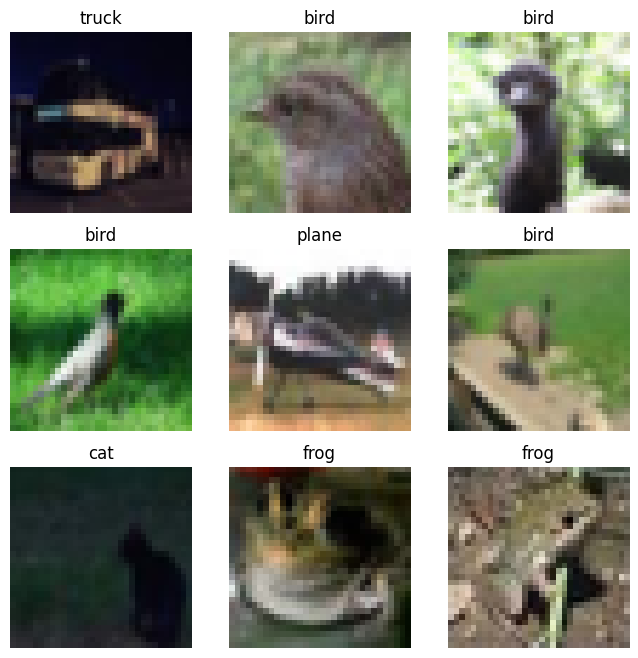

In [5]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()

    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.permute(1,2,0))
plt.show()